<a href="https://colab.research.google.com/github/Rajeshprd/Heart-Failure-Model/blob/main/Heart_Failure_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing the dataset**

In [2]:
h_data = pd.read_csv("/content/Copy of Heart Failure Dataset.csv")

#**Description of dataset**

In [3]:
h_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
h_data.shape

(299, 13)

In [7]:
h_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
h_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#**Exploratory Data Analysis [EDA]**

In [9]:
h_data.isnull().sum() # No null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

###Lets start with the Age

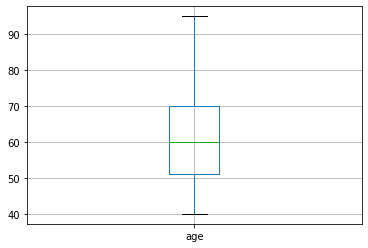

In [11]:
h_data.boxplot("age")

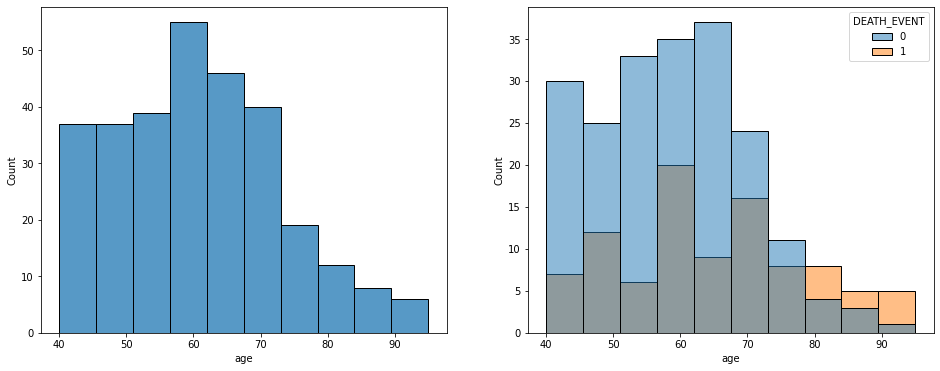

In [12]:
fig,axes = plt.subplots(1,2,figsize=[16,6])
sns.histplot(ax=axes[0],x='age',data=h_data,bins=10)
sns.histplot(ax=axes[1],x='age',data=h_data,bins=10,hue="DEATH_EVENT")
plt.show()
#we can see that the most common age to identify the problem is around 60 - 70 also has the most deaths too, but can't be said that deaths are dependent on the Age.

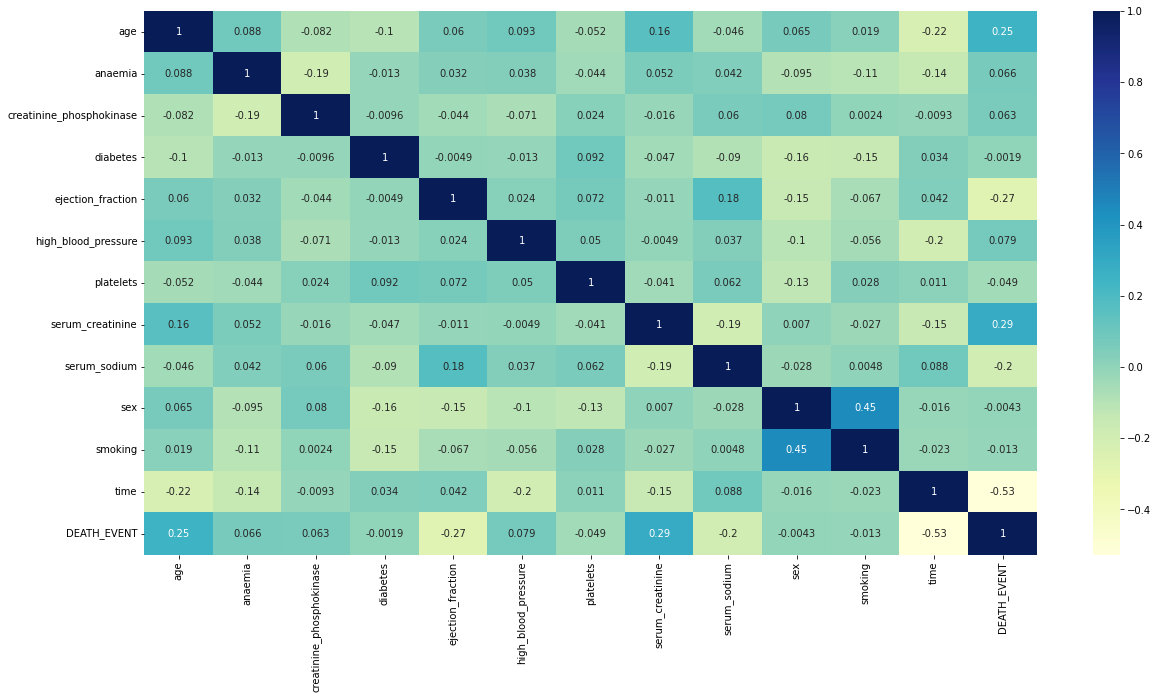

In [19]:
plt.figure(figsize=[20,10])
sns.heatmap(data=h_data.corr(),annot=True, cmap="YlGnBu")
plt.show()

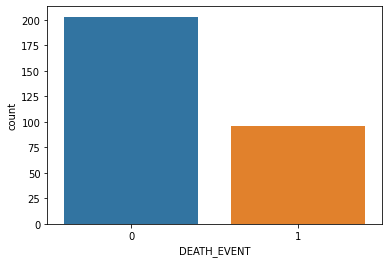

In [20]:
sns.countplot(x="DEATH_EVENT",data=h_data)

#**Model Building**

###Importing libraries for model creation

In [47]:
from sklearn.preprocessing import StandardScaler # for the feature engineering
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

#classification libraries

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Seperating the target and dependent variable

In [22]:
y = h_data.DEATH_EVENT
X = h_data.drop(columns="DEATH_EVENT")

#**Splitting the data**

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=123,stratify=y)

In [29]:
print(f'Shape of the data:\n Shape of X_train = {X_train.shape}, Shape of X_test = {X_test.shape},\n Shape of y_train = {y_train.shape}, Shape of y_test = {y_test.shape}')

Shape of the data:
 Shape of X_train = (239, 12), Shape of X_test = (60, 12),
 Shape of y_train = (239,), Shape of y_test = (60,)


#Feature Scalling

In [30]:
scale = StandardScaler(with_std=True)

X_scale_train = scale.fit_transform(X_train)

X_scale_test = scale.transform(X_test)

#**KNN Classification**

In [92]:
result = pd.DataFrame(columns = [ "k", "score_test", "score_train"])
for k in range(1,106): 
    knnmodel = KNeighborsClassifier(k)
    knnmodel.fit(X_train,y_train)
    knnmodel.score(X_test,y_test)
    result = result.append({ "k" : k, "score_test" : knnmodel.score(X_test,y_test) , "score_train" :knnmodel.score(X_train,y_train)  },ignore_index=True)

In [94]:
print(f"KNN model train score : {knnmodel.score(X_train,y_train)}")

KNN model train score : 0.6778242677824268


#**Decision Tree**

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_scale_train,y_train)

print(f"Decision tree score : {dt_model.score(X_scale_test,y_test)}")

Decision tree score : 0.8166666666666667


In [33]:
print(f"Decision tree train score : {dt_model.score(X_scale_train,y_train)}")

Decision tree train score : 1.0


#**Random Forest Classifier**

In [55]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
rfmodel.score(X_test,y_test) #testing accuracy

0.9166666666666666

In [58]:
rfmodel.score(X_train,y_train) #training accuracy

1.0

In [59]:
print(f"Random Forest train score : {rf_model.score(X_scale_train,y_train)}")

Random Forest train score : 1.0


#**Gradient Boosting Classifier**

In [49]:
gbmodel = GB()

In [50]:
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier()

In [51]:
gbmodel.score(X_test,y_test) #testing accuracy

0.9

In [52]:
gbmodel.score(X_train,y_train) #training accuracy

1.0

In [60]:
print(f"Gradient Boosting train score : {gbmodel.score(X_train,y_train)}")

Gradient Boosting train score : 1.0


#**XGBClassifier model**

In [68]:
xgmodel = XGBClassifier()
xgmodel.fit(X_train,y_train)

XGBClassifier()

In [69]:
xgmodel.score(X_test,y_test) #testing accuracy

0.9

In [70]:
xgmodel.score(X_train,y_train)

0.9916317991631799

In [71]:
print(f"XGBClassifier train score : {xgmodel.score(X_train,y_train)}")

XGBClassifier train score : 0.9916317991631799


#**Adaboost**

In [72]:
abmodel = AdaBoostClassifier()
abmodel.fit(X_train,y_train)

AdaBoostClassifier()

In [73]:
abmodel.score(X_test,y_test) #testing accuracy

0.85

In [74]:
abmodel.score(X_train,y_train) #training accuracy

0.9414225941422594

In [75]:
print(f"Adaboost train score : {abmodel.score(X_train,y_train)}")

Adaboost train score : 0.9414225941422594


#**Model Evaluation**

In [ ]:
pred_y = abmodel.predict(X_scale_test)

In [80]:
confusion_matrix(y_test,pred_y)

array([[ 0, 41],
       [ 0, 19]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


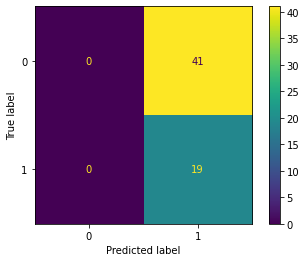

In [82]:
plot_confusion_matrix(estimator=abmodel,X=X_scale_test,y_true=y_test)

In [83]:
precision = 28/(28+3)
print(f"the precision of the model is: {precision}")

the precision of the model is: 0.9032258064516129


In [84]:
recall = 28/(28+5)
print(f"the recall of the model is: {recall}")

the recall of the model is: 0.8484848484848485


In [86]:
print("score for the model: ",2*precision*recall/(precision+recall))

score for the model:  0.875


#**Scalling model**

In [87]:
X_scale = scale.transform(X)

In [88]:
final_model = abmodel.fit(X_scale,y)

print("Model created sucessfully")

Model created sucessfully
